# Getting the Credit-score data from Kaggle

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#!kaggle datasets download -d parisrohan/credit-score-classification -p /content

#!unzip /content/credit-score-classification.zip -d /content

train_data = pd.read_csv('C:/Users/rajih/OneDrive/Documents/GitHub/E-commerce_Promotion_Analysis/Datasets/train.csv')
test_data = pd.read_csv('C:/Users/rajih/OneDrive/Documents/GitHub/E-commerce_Promotion_Analysis/Datasets/test.csv')
#'/content/test.csv'
# Training and testing sets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (100000, 28)
Testing data shape: (50000, 27)


# Exploratory Data Analysis

Study each attribute and its characteristics:

*   Name
*   Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
*   % of missing values
*   Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
*   Possibly useful for the task?
*   Type of distribution (Gaussian, uniform, logarithmic, etc)

Quick look into the columns

In [72]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           100000 non-null  object 
 1   Customer_ID                  100000 non-null  object 
 2   Month                        100000 non-null  object 
 3   Name                         100000 non-null  object 
 4   Age                          100000 non-null  int64  
 5   SSN                          100000 non-null  object 
 6   Occupation                   100000 non-null  object 
 7   Annual_Income                100000 non-null  int64  
 8   Monthly_Inhand_Salary        100000 non-null  float64
 9   Num_Bank_Accounts            100000 non-null  int64  
 10  Num_Credit_Card              100000 non-null  int64  
 11  Interest_Rate                100000 non-null  int64  
 12  Num_of_Loan                  100000 non-null  int64  
 13  

Checking for duplicates

In [61]:
train_data.duplicated().sum()

0

Quick look into first few rows

In [62]:
train_data.sample(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
45209,0x11ee7,CUS_0x604,February,Emily Stephensonm,16,962-03-7975,Lawyer,65984.28,5278.690000,8,3,3326,4_,"Personal Loan, Payday Loan, Home Equity Loan, ...",15,19,_,12.0,Standard,1377.35,39.800996,9 Years and 0 Months,Yes,169.797237,58.30256295932888,High_spent_Large_value_payments,539.7692001510409,Poor
11685,0x5a77,CUS_0x96d9,June,Kaiserw,18,772-15-1692,Entrepreneur,57588.9,5098.075000,3,4,5,3,"Personal Loan, Credit-Builder Loan, and Studen...",14,17,6.07,1.0,Standard,288.34,27.038955,32 Years and 6 Months,No,115.577372,118.91269640677608,High_spent_Medium_value_payments,525.3174320517087,Standard
11844,0x5b66,CUS_0x4fe9,May,Schladerm,23,296-37-3283,Doctor,128066.44,10394.203333,4,6,6,4,"Mortgage Loan, Credit-Builder Loan, Credit-Bui...",-5,8,5.38,2.0,Good,1004.44,29.490599,19 Years and 3 Months,NM,366.397466,129.74986137317075,High_spent_Large_value_payments,783.2730056772892,Poor
48930,0x134b4,CUS_0x9275,March,Deepa Seetharamanl,23,143-85-0520,Developer,30370.09,NaN,1,4,8,0,NaN,4,10,4.94,0.0,Good,1333.93,36.517149,21 Years and 5 Months,NM,0.000000,92.1283020764332,High_spent_Medium_value_payments,384.5557812569001,Standard
96879,0x24da5,CUS_0x1837,August,NaN,36,600-87-2067,Musician,34180.94_,2685.411667,6,5,19,7,"Home Equity Loan, Credit-Builder Loan, Not Spe...",62,NaN,-3.37,10.0,Bad,3375.66_,25.155426,NaN,Yes,135.852295,265.81546954347635,Low_spent_Small_value_payments,156.8734020080926,Poor


Changing the types of columns

In [3]:
num_cols = ["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card","Interest_Rate","Num_of_Loan", "Delay_from_due_date","Num_of_Delayed_Payment","Changed_Credit_Limit", "Num_Credit_Inquiries","Outstanding_Debt","Credit_Utilization_Ratio","Total_EMI_per_month","Amount_invested_monthly",	"Monthly_Balance","Credit_History_Age"]
cat_cols = ["Occupation","Credit_Mix", "Spending_Level","Payment_Value","Payment_of_Min_Amount"]
target_col = ["Credit_Score"]

In [4]:
class DataCleaner:
    def __init__(self, dataframe, numeric_columns):
        self.dataframe = dataframe
        self.numeric_columns = numeric_columns

    def clean_numeric_columns(self):

        for col in self.numeric_columns:

            if self.dataframe[col].dtype == 'object':
                self.dataframe[col] = self.dataframe[col].str.extract(r'(\d+)')
                self.dataframe[col] = pd.to_numeric(self.dataframe[col], errors='coerce')
                self.dataframe[col] = self.dataframe[col].fillna(self.dataframe[col].median())

            else:
                self.dataframe[col] = self.dataframe[col].fillna(self.dataframe[col].median())

        return self.dataframe



cleaner = DataCleaner(train_data, num_cols)
df = cleaner.clean_numeric_columns()

% of missing values

In [5]:
df.isnull().sum()/float(len(df))*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary        0.000
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       0.000
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         0.000
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           0.000
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      0.000
Payment_Behaviour            0.000
Monthly_Balance              0.000
Credit_Score                 0.000
dtype: float64

Looking into Null-values in Name

In [66]:
df['Name'].nunique()

10139

In [67]:
df[df['Name'].isnull()].head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6.0,11.0,4.0,Good,809,23.933795,18.0,No,49.574949,24.0,High_spent_Medium_value_payments,358.0,Standard
17,0x161b,CUS_0x2dbc,February,NaN,34,486-85-3974,Engineer,143162,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",13,6.0,7.0,3.0,Good,1303,41.702573,17.0,No,246.992319,232.0,High_spent_Small_value_payments,998.0,Good
22,0x1620,CUS_0x2dbc,July,NaN,34,486-85-3974,Engineer,143162,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6.0,7.0,3.0,Good,1303,38.068624,18.0,No,246.992319,263.0,High_spent_Small_value_payments,968.0,Standard
64,0x1662,CUS_0x4157,January,NaN,23,070-19-1622,Doctor,114838,9843.867500,2,5,7,100,"Personal Loan, Debt Consolidation Loan, and Au...",13,11.0,8.0,3.0,Good,1377,33.664554,21.0,No,226.892792,215.0,High_spent_Small_value_payments,802.0,Good
80,0x167a,CUS_0xa66b,January,NaN,40,221-30-8554,Teacher,33751,2948.605833,5,5,20,3,"Credit-Builder Loan, Personal Loan, and Auto Loan",16,20.0,11.0,4.0,Standard,1328,37.089076,19.0,NM,65.008174,117.0,High_spent_Medium_value_payments,362.0,Standard


 - Replacing Null values in Name with the name available for same customer id in another row

In [6]:
# Create a mapping of Customer ID to Name where Name is not null
id_name_mapping = df.loc[df['Name'].notnull(), ['Customer_ID', 'Name']].set_index('Customer_ID')['Name'].to_dict()

# Function to fill missing names using the mapping
def fill_missing_name(row):
    if pd.isnull(row['Name']):
        return id_name_mapping.get(row['Customer_ID'])
    return row['Name']

# Apply the function to fill missing names
df['Name'] = df.apply(fill_missing_name, axis=1)

#Check for any remaining missing names after applying the function
print(df['Name'].isnull().sum())


0


Looking into null-values for Type of Loan

In [69]:
df['Type_of_Loan'].nunique()

6260

In [70]:
df[df['Type_of_Loan'].isnull()].head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
32,0x1632,CUS_0x1cdb,January,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,0,NaN,5,14.0,2.0,4.0,Standard,943,39.797764,30.0,Yes,0.0,276.0,!@9#%8,288.0,Standard
33,0x1633,CUS_0x1cdb,February,Deepaa,21,615-06-7821,Developer,35547,3093.745000,7,5,5,0,NaN,9,14.0,2.0,4.0,Standard,943,27.020360,30.0,NM,0.0,74.0,High_spent_Medium_value_payments,460.0,Standard
34,0x1634,CUS_0x1cdb,March,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,100,NaN,5,12.0,2.0,4.0,Standard,943,23.462303,30.0,Yes,0.0,173.0,Low_spent_Medium_value_payments,392.0,Standard
35,0x1635,CUS_0x1cdb,April,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,0,NaN,1,15.0,2.0,4.0,_,943,28.924954,30.0,Yes,0.0,96.0,High_spent_Medium_value_payments,438.0,Standard
36,0x1636,CUS_0x1cdb,May,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,0,NaN,9,17.0,2.0,4.0,_,943,41.776187,31.0,Yes,0.0,62.0,High_spent_Small_value_payments,482.0,Standard
37,0x1637,CUS_0x1cdb,June,Deepaa,21,615-06-7821,Developer,35547,3093.745000,7,5,5,0,NaN,5,15.0,2.0,4.0,Standard,943,29.217556,31.0,Yes,0.0,37.0,High_spent_Medium_value_payments,497.0,Standard
38,0x1638,CUS_0x1cdb,July,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,0,NaN,10,15.0,2.0,4.0,Standard,943,26.263823,31.0,Yes,0.0,181.0,Low_spent_Small_value_payments,394.0,Standard
39,0x1639,CUS_0x1cdb,August,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,100,NaN,1,15.0,2.0,4.0,Standard,943,25.862922,31.0,Yes,0.0,181.0,High_spent_Small_value_payments,364.0,Standard
40,0x163e,CUS_0x95ee,January,Np,31,612-70-8987,Lawyer,73928,3093.745000,4,1288,8,0,NaN,12,10.0,10.0,2.0,Good,548,39.962685,18.0,No,15015.0,98.0,High_spent_Large_value_payments,740.0,Good
41,0x163f,CUS_0x95ee,February,Np,31,612-70-8987,_______,73928,5988.705000,4,5,8,0,NaN,8,7.0,10.0,2.0,Good,548,42.769864,32.0,NM,0.0,172.0,Low_spent_Medium_value_payments,705.0,Good


In [71]:
df[df['Type_of_Loan'].isnull() & (df['Num_of_Loan'] != 0)].head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
34,0x1634,CUS_0x1cdb,March,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,100,NaN,5,12.0,2.0,4.0,Standard,943,23.462303,30.0,Yes,0.0,173.0,Low_spent_Medium_value_payments,392.0,Standard
39,0x1639,CUS_0x1cdb,August,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,100,NaN,1,15.0,2.0,4.0,Standard,943,25.862922,31.0,Yes,0.0,181.0,High_spent_Small_value_payments,364.0,Standard
180,0x170e,CUS_0xac86,May,Nickb,20,028-16-4402,Entrepreneur,106733,8873.427500,4,4,1,100,NaN,5,6.0,0.0,0.0,Good,76,28.820554,33.0,No,0.0,345.0,High_spent_Medium_value_payments,791.0,Good
327,0x17e9,CUS_0xb5ff,August,Nateg,33,060-81-1328,Media_Manager,12909,853.824583,5,5,13,100,NaN,22,15.0,7.0,3.0,Standard,602,23.579851,17.0,No,0.0,60.0,Low_spent_Medium_value_payments,305.0,Standard
355,0x1815,CUS_0xaedb,April,Olivia Oranr,19,272-47-1135,Musician,85554,7185.502500,4,2,3,100,NaN,12,7.0,6.0,3.0,Good,1095,31.360245,19.0,No,0.0,303.0,Low_spent_Large_value_payments,684.0,Good
356,0x1816,CUS_0xaedb,May,Olivia Oranr,19,272-47-1135,Musician,85554,7185.502500,1488,2,3,100,NaN,14,14.0,6.0,3.0,_,1095,41.661802,19.0,No,0.0,70.0,High_spent_Large_value_payments,887.0,Good
427,0x1881,CUS_0x9ce6,April,Ekr,43,#F%$D@*&8,Developer,123732,10416.026667,4,3,11,100,NaN,15,8.0,11.0,3.0,Good,1154,38.990635,27.0,No,0.0,532.0,Low_spent_Medium_value_payments,789.0,Standard
449,0x18a3,CUS_0x3f5b,February,Mikeh,25,#F%$D@*&8,Doctor,80108,6866.692500,5,3,17,100,NaN,28,19.0,14.0,1.0,Standard,997,26.173145,17.0,Yes,0.0,52.0,High_spent_Large_value_payments,874.0,Standard
712,0x1a2e,CUS_0x3861,January,Fiona Ortizx,53,212-32-2085,Engineer,17992,3093.745000,3,5,6,100,NaN,5,9.0,8.0,2.0,Good,565,22.380399,18.0,No,0.0,88.0,!@9#%8,348.0,Poor
953,0x1b97,CUS_0x567b,February,Marilynj,54,542-44-1751,Manager,80396,6623.738333,5,7,9,100,NaN,8,11.0,10.0,0.0,Good,1357,37.808974,26.0,No,0.0,482.0,Low_spent_Large_value_payments,450.0,Good


We can see some of the rows with empty Type_of_Load values with really high value of Num_of Loan. Changing the values of Num of Loans to zero where the type of loan is empty since these seem to be errors

In [72]:
df[df['Type_of_Loan'].isnull()]['Num_of_Loan'].value_counts()

Num_of_Loan
0       10930
100       417
50          2
911         2
439         1
1419        1
1430        1
1382        1
437         1
372         1
126         1
1074        1
288         1
378         1
652         1
33          1
1296        1
1384        1
773         1
415         1
275         1
350         1
507         1
1129        1
1027        1
897         1
546         1
215         1
1478        1
83          1
18          1
621         1
999         1
831         1
538         1
501         1
1035        1
1347        1
193         1
1451        1
995         1
654         1
153         1
1369        1
143         1
1416        1
238         1
1070        1
1444        1
103         1
172         1
252         1
330         1
394         1
1227        1
859         1
336         1
940         1
1447        1
881         1
801         1
Name: count, dtype: int64

Testing to see if all people with no loans have empty type of load column

In [37]:
df[df['Num_of_Loan'] == 0]['Type_of_Loan'].value_counts()

Series([], Name: count, dtype: int64)

Testing for people who do have type of loan in the column but have unreasonably high values of number of loans

In [ ]:
df2 = df[~df['Type_of_Loan'].isnull()]

df2[df2['Num_of_Loan'] > 20]['Num_of_Loan'].value_counts()

Num_of_Loan
100     3460
1150       4
1228       3
430        3
1480       3
1365       2
192        2
855        2
955        2
936        2
773        2
1131       2
229        2
217        2
227        2
95         2
1181       2
1320       2
661        2
1463       2
696        2
141        2
697        2
58         2
1236       2
1209       2
290        2
359        2
31         2
1217       2
1214       2
1353       2
1259       2
1127       2
1464       2
1354       2
352        2
404        2
1017       2
251        2
898        2
875        2
49         2
1412       2
527        2
466        2
23         2
1241       2
288        2
597        2
733        2
1225       2
284        2
868        1
190        1
1457       1
1297       1
991        1
701        1
809        1
1222       1
1340       1
1274       1
520        1
1159       1
571        1
1216       1
889        1
967        1
581        1
1077       1
629        1
387        1
633        1
659        1
87         1


Testing on a customer level to see if its an error or genuine values

In [58]:
df2[df2['Name'] == 'Lauren Tarao' ]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Personal Loan,and Home Equity Loan,and Not Specified,Not Specified,and Mortgage Loan,and Student Loan,Debt Consolidation Loan,and Auto Loan,and Payday Loan,Payday Loan,Student Loan,and Personal Loan,Home Equity Loan,Mortgage Loan,and Debt Consolidation Loan,and Credit-Builder Loan
31008,0xcbb2,CUS_0xedd,January,Lauren Tarao,30,888-82-5609,Engineer,125468,10445.703333,4,4,10,4,"Payday Loan, Credit-Builder Loan, Personal Loa...",23,13.0,10.0,4.0,Standard,1136,29.866322,19.0,Yes,338.092409,227.0,High_spent_Large_value_payments,718.0,Standard,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
31009,0xcbb3,CUS_0xedd,February,Lauren Tarao,30,888-82-5609,Engineer,125468,10445.703333,4,4,10,4,"Payday Loan, Credit-Builder Loan, Personal Loa...",15,16.0,10.0,4.0,Standard,1136,30.955492,19.0,Yes,338.092409,209.0,High_spent_Small_value_payments,757.0,Standard,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
31010,0xcbb4,CUS_0xedd,March,Lauren Tarao,30,888-82-5609,Engineer,125468,10445.703333,4,4,10,4,"Payday Loan, Credit-Builder Loan, Personal Loa...",18,10.0,5.0,4.0,Standard,1136,30.499955,19.0,Yes,338.092409,814.0,Low_spent_Medium_value_payments,171.0,Standard,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
31011,0xcbb5,CUS_0xedd,April,Lauren Tarao,30,888-82-5609,Engineer,125468,10445.703333,4,4,10,4,"Payday Loan, Credit-Builder Loan, Personal Loa...",18,13.0,10.0,4.0,Standard,1136,26.109106,19.0,Yes,338.092409,383.0,High_spent_Medium_value_payments,572.0,Standard,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
31012,0xcbb6,CUS_0xedd,May,Lauren Tarao,30,888-82-5609,Engineer,125468,3093.745000,4,4,10,4,"Payday Loan, Credit-Builder Loan, Personal Loa...",16,13.0,10.0,4.0,_,1136,26.271873,19.0,Yes,338.092409,339.0,High_spent_Medium_value_payments,616.0,Standard,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
31013,0xcbb7,CUS_0xedd,June,Lauren Tarao,30,888-82-5609,Engineer,125468,10445.703333,4,4,10,4,"Payday Loan, Credit-Builder Loan, Personal Loa...",23,16.0,13.0,4.0,Standard,1136,33.212818,19.0,Yes,338.092409,297.0,Low_spent_Large_value_payments,679.0,Standard,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
31014,0xcbb8,CUS_0xedd,July,Lauren Tarao,30,888-82-5609,Engineer,125468,10445.703333,4,4,10,4,"Payday Loan, Credit-Builder Loan, Personal Loa...",17,15.0,10.0,4.0,Standard,1136,36.724552,19.0,Yes,338.092409,318.0,High_spent_Medium_value_payments,637.0,Standard,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
31015,0xcbb9,CUS_0xedd,August,Lauren Tarao,500,888-82-5609,Engineer,125468,10445.703333,4,4,10,4,"Payday Loan, Credit-Builder Loan, Personal Loa...",18,13.0,9.0,4.0,Standard,1136,39.053760,19.0,Yes,338.092409,590.0,High_spent_Small_value_payments,376.0,Standard,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
98624,0x257e2,CUS_0x95c9,January,Lauren Tarao,39,326-89-0421,Mechanic,59612,3093.745000,6,5,32,7,"Credit-Builder Loan, Auto Loan, Not Specified,...",60,25.0,17.0,8.0,Bad,4764,24.609677,2.0,Yes,283.733432,135.0,High_spent_Medium_value_payments,336.0,Poor,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
98625,0x257e3,CUS_0x95c9,February,Lauren Tarao,39,326-89-0421,Mechanic,59612,3093.745000,6,5,32,7,"Credit-Builder Loan, Auto Loan, Not Specified,...",60,25.0,17.0,12.0,Bad,4764,38.940971,3.0,Yes,283.733432,499.0,Low_spent_Small_value_payments,336.0,Poor,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0


Seems like an error. Let's see how many times people have had high value of loans in our dataset. Looks like we can drop these rows.

In [52]:
df2[df2['Num_of_Loan'] > 30]['Name'].value_counts()

Caroline Valetkevitchj       5
Miedemac                     5
Kevin Yaob                   5
Marial                       4
Rick Rothackern              4
Jonathan Stempelm            4
Ingramk                      4
Shalal-Esan                  4
Michaelr                     4
Kazunori Takadax             4
Andreas Cremerm              4
Sabaj                        4
Stempelx                     4
Jasonb                       3
Felsenthalf                  3
Eveline Danubratae           3
Lesleys                      3
Mutikanib                    3
Anurag Kotokyh               3
Andrew Longstrethd           3
Vlastelicax                  3
Jonathan Spicerb             3
Deepa Seetharamanm           3
Margaretj                    3
Spicerl                      3
Sarah N.p                    3
Robin Emmotto                3
Leika Kiharal                3
Sujata Raoa                  3
Turnerd                      3
Wayne Colel                  3
Silviac                      3
Chuckh  

Let's extract types of loan and one-hot encode it into our dataset

In [ ]:
# Flatten all loan types into a single list and get unique loan types
unique_loan_types = pd.unique(df['Type_of_Loan'].dropna().str.split(', ').sum())

# Display unique loan types
print(unique_loan_types)


In [ ]:
# Create a new column for each unique loan type with binary indicators
for loan_type in unique_loan_types:
    df[loan_type] = df['Type_of_Loan'].apply(lambda x: 1 if pd.notnull(x) and loan_type in x else 0)

# Display the updated dataframe
df.head()



,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Personal Loan,and Home Equity Loan,and Not Specified,Not Specified,and Mortgage Loan,and Student Loan,Debt Consolidation Loan,and Auto Loan,and Payday Loan,Payday Loan,Student Loan,and Personal Loan,Home Equity Loan,Mortgage Loan,and Debt Consolidation Loan,and Credit-Builder Loan
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.0,4.0,_,809,26.822620,22.0,No,49.574949,80.0,High_spent_Small_value_payments,312.0,Good,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,14.0,11.0,4.0,Good,809,31.944960,18.0,No,49.574949,118.0,Low_spent_Large_value_payments,284.0,Good,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,9.0,4.0,Good,809,28.609352,22.0,No,49.574949,81.0,Low_spent_Medium_value_payments,331.0,Good,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.0,4.0,Good,809,31.377862,22.0,No,49.574949,199.0,Low_spent_Small_value_payments,223.0,Good,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,14.0,11.0,4.0,Good,809,24.797347,22.0,No,49.574949,41.0,High_spent_Medium_value_payments,341.0,Good,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [7]:
df[df['Customer_ID'] == 'CUS_0x2dbc']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,_______,143162,12187.220,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8.0,7.0,3.0,Good,1303,28.616735,17.0,No,246.992319,168.0,!@9#%8,1043.0,Good
17,0x161b,CUS_0x2dbc,February,Langep,34,486-85-3974,Engineer,143162,12187.220,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",13,6.0,7.0,3.0,Good,1303,41.702573,17.0,No,246.992319,232.0,High_spent_Small_value_payments,998.0,Good
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,_______,143162,3093.745,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,7.0,11.0,6.0,Good,1303,26.519815,17.0,No,246.992319,10000.0,High_spent_Small_value_payments,715.0,Good
19,0x161d,CUS_0x2dbc,April,Langep,34,486-85-3974,Engineer,143162,12187.220,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,5.0,9.0,3.0,_,1303,39.501648,18.0,No,246.992319,825.0,Low_spent_Medium_value_payments,426.0,Good
20,0x161e,CUS_0x2dbc,May,Langep,34,486-85-3974,_______,143162,12187.220,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",10,5.0,7.0,3.0,Good,1303,31.376150,18.0,No,246.992319,430.0,Low_spent_Large_value_payments,810.0,Good
21,0x161f,CUS_0x2dbc,June,Langep,34,486-85-3974,Engineer,143162,12187.220,1,5,8,967,"Auto Loan, Auto Loan, and Not Specified",8,6.0,7.0,3.0,Good,1303,39.783993,18.0,No,246.992319,257.0,High_spent_Medium_value_payments,963.0,Good
22,0x1620,CUS_0x2dbc,July,Langep,34,486-85-3974,Engineer,143162,12187.220,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6.0,7.0,3.0,Good,1303,38.068624,18.0,No,246.992319,263.0,High_spent_Small_value_payments,968.0,Standard
23,0x1621,CUS_0x2dbc,August,Langep,34,486-85-3974,Engineer,143162,12187.220,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6.0,7.0,3.0,Good,1303,38.374753,18.0,No,246.992319,10000.0,High_spent_Small_value_payments,895.0,Standard


Display some basic statistics for Numerical Data

In [8]:
train_data.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,119.509700,1.764152e+05,4029.084964,17.091280,22.47443,72.466040,10.761960,21.068780,29.759690,9.945490,27.326780,1425.722400,32.285173,17.969540,1403.118217,614.454560,3.000000e+22
std,684.757313,1.429618e+06,2961.363540,117.404834,129.05741,466.422621,61.789933,14.860104,218.014703,6.605945,191.293766,1155.131822,5.116875,7.935336,8306.041270,1999.832038,3.162151e+24
min,14.000000,7.005000e+03,303.645417,-1.000000,0.00000,1.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,25.000000,1.945700e+04,1792.084167,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.000000,3.000000,566.000000,28.052567,12.000000,30.306660,77.000000,2.710000e+02
50%,34.000000,3.757800e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.000000,6.000000,1166.000000,32.305784,18.000000,69.249473,135.000000,3.360000e+02
75%,42.000000,7.279000e+04,5371.525000,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,14.000000,9.000000,1945.250000,36.496663,24.000000,161.224249,255.000000,4.630000e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.000000,2597.000000,4998.000000,50.000000,33.000000,82331.000000,10000.000000,3.333333e+26


# Display some basic statistics
print(train_data.describe())

# Check for missing values
print(train_data.isnull().sum())

# Check data types of each column
print(train_data.dtypes)

# Explore categorical features
for col in train_data.select_dtypes(include=['object']):
    print(f"\nColumn: {col}")
    print(train_data[col].value_counts())

# Explore numerical features (histograms, box plots)
import matplotlib.pyplot as plt
import seaborn as sns

for col in train_data.select_dtypes(include=['int64', 'float64']):
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(y=train_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Explore relationships between features and the target variable
sns.pairplot(train_data, hue='Credit_Score')
plt.show()

# Correlation matrix
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


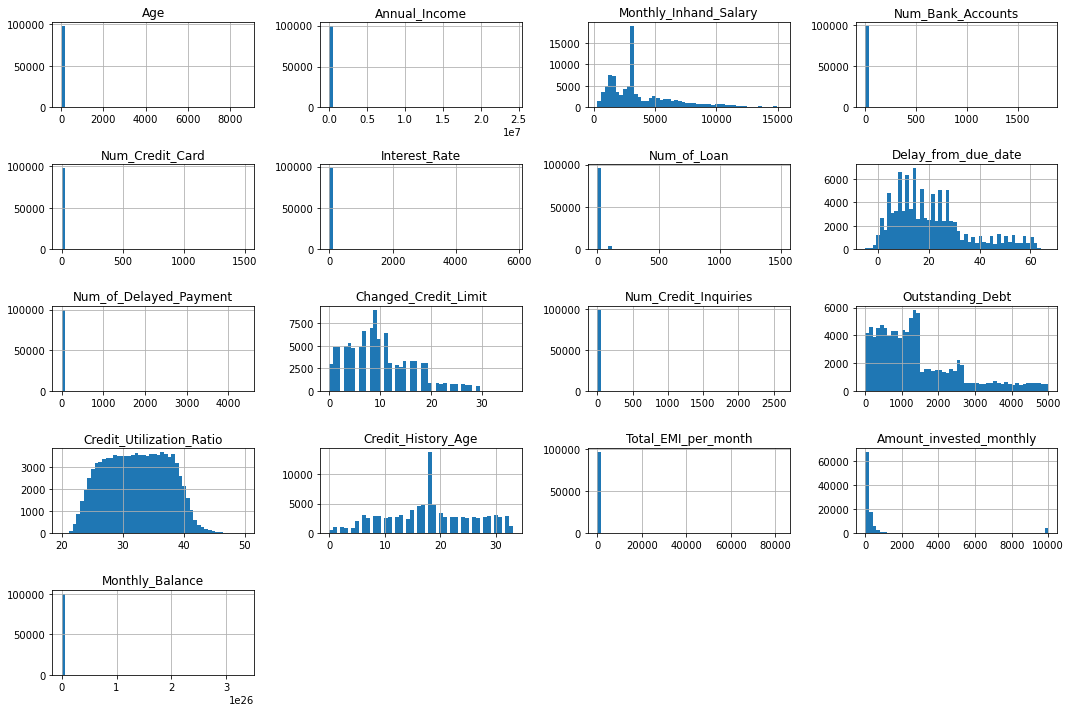

In [9]:
import numpy as np
import matplotlib.pyplot as plt

all_numeric = df.select_dtypes(include=[np.number]).columns

# Filter out columns that are effectively binary or near-binary(e.g., those with <= 2 unique values)
numeric_cols = [col for col in all_numeric if df[col].nunique() > 2]

# plot histograms for truly numeric columns
df[numeric_cols].hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

AGE - VARIABLE - DEALING WITH OUTLIERS

In [ ]:
#lets look at age variable
age_over_100= (df['Age'] > 100).sum()
age_over_100
age_over_100_percent= (age_over_100 / len(df['Age'])) * 100

print(f'# of users listed as over 100: {age_over_100}, {age_over_100_percent:.2f}%')

#We see max age at 8698, which is obviously an error

#Average Life Expectancy in the USA is typically around 78 Years, building buffer, we will cap age at 100 and impute the rest with median

realistic_ages = df['Age'][df['Age'] <= 110] # or 100.
median_age = realistic_ages.median()

# 2. Impute values over 100 with the median
df['Age'] = np.where(df['Age'] > 100, median_age, df['Age'])

print(df['Age'].describe()) #check the results.

# of users listed as over 100: 2776, 2.78%
count    100000.000000
mean         33.314300
std          10.628376
min          14.000000
25%          25.000000
50%          33.000000
75%          41.000000
max         100.000000
Name: Age, dtype: float64


Month - Converting from Categorical

Converting Month to non-categorical, using cyclical encoding given cylical nature of months. This Preserves the fact that month 12 (December) is close to month 1 (January) and often yields better results for time-of-year effects in certain models. We will test need for month and then decide way forward in our model given we don't antipate month playing a strong role in credit score prediction

In [11]:
#MONTHS - CYCLICAL ENCODING 

# Map months
month_map = {
    'January': 1, 'Jan': 1,
    'February': 2, 'Feb': 2,
    'March': 3, 'Mar': 3,
    'April': 4, 'Apr': 4,
    'May': 5,
    'June': 6, 'Jun': 6,
    'July': 7, 'Jul': 7,
    'August': 8, 'Aug': 8,
    'September': 9, 'Sep': 9,
    'October': 10, 'Oct': 10,
    'November': 11, 'Nov': 11,
    'December': 12, 'Dec': 12
}

df["Month_num"] = df["Month"].map(month_map)

df["Month_num"] = df["Month"].map(month_map)

# create cyclical features
df["Month_sin"] = np.sin(2 * np.pi * df["Month_num"] / 12)
df["Month_cos"] = np.cos(2 * np.pi * df["Month_num"] / 12)


Occupation

Occupation Value Counts:
 _______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64


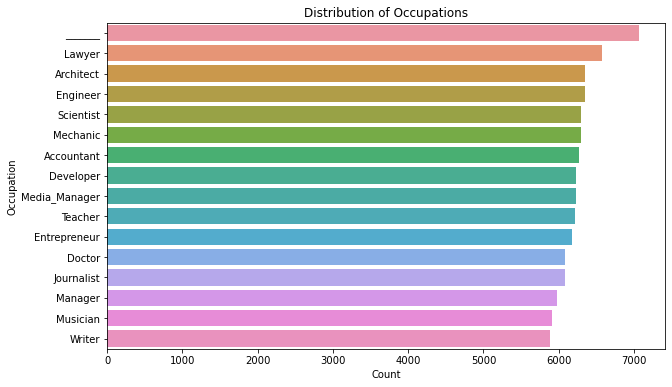

In [13]:
import seaborn as sns
occupation_counts = df['Occupation'].value_counts()
print("Occupation Value Counts:\n", occupation_counts)

# 2. Bar Plot (Visual Distribution)
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.countplot(y='Occupation', data=df, order=df['Occupation'].value_counts().index) #order by most frequent.
plt.title('Distribution of Occupations')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()


One-Hot Encode post dealing with  7062 values shown as not ___. 
We assume this is from users who didn't fill an Occupation, this may be because they don't have a job or don't wnat to share, this in itself can be telling. so we will impute this as unkown

In [14]:
df["Occupation"] = df["Occupation"].replace("_______", "Unknown")
df = pd.get_dummies(df, columns=["Occupation"], prefix="Occ", drop_first=True)


Annual Income 
check for outliers given earlier data descriptions + histogram insights

Number of outliers by Z-score: 830
Number of people above $1000000: 961
Percentage of dataset: 0.96%


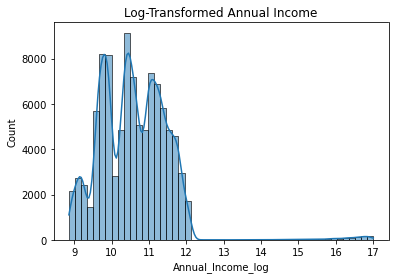

In [15]:

income_mean = df["Annual_Income"].mean()
income_std = df["Annual_Income"].std()

# Compute Z-scores
df["income_zscore"] = (df["Annual_Income"] - income_mean) / income_std

# Choose a threshold, e.g., |z| > 3 for "extreme" outliers
outliers_z = df[np.abs(df["income_zscore"]) > 3]
print("Number of outliers by Z-score:", len(outliers_z))


# we expect outliers in income related data -- check if this makes sense with real world knowlede
threshold = 1_000_000  # or pick another large threshold
num_above_threshold = df[df["Annual_Income"] > threshold].shape[0]
pct_above_threshold = num_above_threshold / len(df) * 100

print(f"Number of people above ${threshold}: {num_above_threshold}")
print(f"Percentage of dataset: {pct_above_threshold:.2f}%")
#As often shared -- top 1% have extraordirarily high incomes

# to deal with with outlier effect we will log transform data 
df["Annual_Income_log"] = np.log1p(df["Annual_Income"])

#visualize
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Annual_Income_log", bins=50, kde=True)
plt.title("Log-Transformed Annual Income")
plt.show()


Month in Hand Salary

Number of outliers by Z-score: 1414


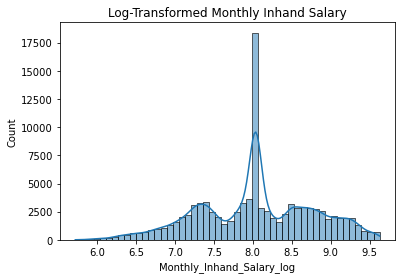

In [16]:
# we will the same for Income salary -- given both are an indicator of income, we will eventually use of the variables

# Calculate mean and standard deviation for Monthly_Inhand_Salary
income_mean = df['Monthly_Inhand_Salary'].mean()
income_std = df['Monthly_Inhand_Salary'].std()

# Compute Z-scores for Monthly_Inhand_Salary
df['income_zscore'] = (df['Monthly_Inhand_Salary'] - income_mean) / income_std

# Identify outliers using Z-score threshold
outliers_z = df[np.abs(df['income_zscore']) > 3]
print("Number of outliers by Z-score:", len(outliers_z))

#once again we will log tansform
# Log transform Monthly_Inhand_Salary
df['Monthly_Inhand_Salary_log'] = np.log1p(df['Monthly_Inhand_Salary'])

# Visualize log-transformed Monthly_Inhand_Salary
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Monthly_Inhand_Salary_log', bins=50, kde=True)
plt.title("Log-Transformed Monthly Inhand Salary")
plt.show()

Bank Accounts -- We will bin bank accounts to account for outliers 

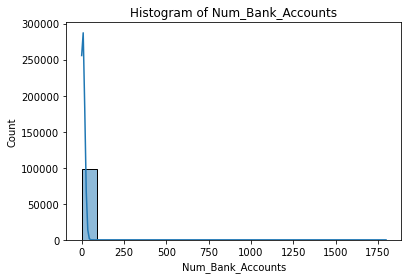

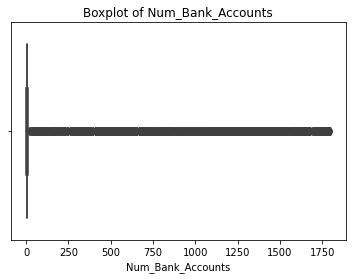

In [ ]:
#review bank account details again 
df['Num_Bank_Accounts'].describe()

plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Num_Bank_Accounts", bins=20, kde=True)
plt.title("Histogram of Num_Bank_Accounts")
plt.show()

# 4. Boxplot (to see outliers/variance)
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Num_Bank_Accounts"])
plt.title("Boxplot of Num_Bank_Accounts")
plt.show()



In [32]:
import numpy as np

# Define the percentiles you want to inspect
quantiles = [0.90, 0.95, 0.99, 0.995, 0.999]

# Calculate the size of the DataFrame for reference
total_count = len(df)

print("Num_Bank_Accounts high-end percentile analysis:")
for q in quantiles:
    threshold = df["Num_Bank_Accounts"].quantile(q)
    # Number of rows at or below the threshold
    num_at_or_below = (df["Num_Bank_Accounts"] <= threshold).sum()
    # Number of rows strictly above the threshold
    num_above = total_count - num_at_or_below
    
    print(f"{q*100:.1f}th percentile = {threshold:.2f}, # people above this % = {num_above}")



Num_Bank_Accounts high-end percentile analysis:
90.0th percentile = 9.00, # people above this % = 6571
95.0th percentile = 10.00, # people above this % = 1324
99.0th percentile = 445.01, # people above this % = 1000
99.5th percentile = 1096.00, # people above this % = 497
99.9th percentile = 1650.00, # people above this % = 100


 upon researching, we see there's no limit to bank accounts. However a max of 1798 bank account is clearly an error. as per Evolve an average person has 5.6 bank accounts. Lets assume people wealth may be signifcantly above average , ie 5-6 times average. we will therefore winsorize and cap at 30.

In [ ]:
#lets see what % is covered at 30: ~99%
total_rows = len(df)
rows_at_or_below_30 = (df["Num_Bank_Accounts"] <= 30).sum()
pct_at_or_below_30 = rows_at_or_below_30 / total_rows * 100
print(f"{rows_at_or_below_30} rows are <= 30, which is {pct_at_or_below_30:.2f}% of the dataset.")


98693 rows are <= 30, which is 98.69% of the dataset.


In [35]:

# Assume 0 bank accounts in the event value is negative
df.loc[df["Num_Bank_Accounts"] < 0, "Num_Bank_Accounts"] = 0


#  Cap all values above 30 to 30
df.loc[df["Num_Bank_Accounts"] > 30, "Num_Bank_Accounts"] = 30


Reviewing Variable: Num_Credit_Card

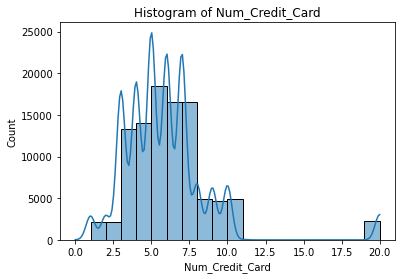

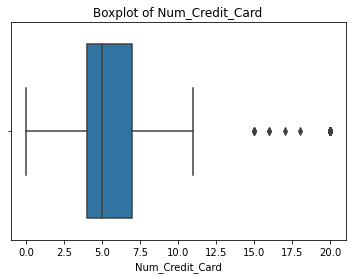

High-end percentiles for Num_Credit_Card:
90th percentile: 9.0
95th percentile: 10.0
99th percentile: 20.0
99th percentile: 20.0
99th percentile: 20.0


In [26]:
#review bank account details again - #max 1499, min 0 
df['Num_Credit_Card'].describe()

plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Num_Credit_Card", bins=20, kde=True)
plt.title("Histogram of Num_Credit_Card")
plt.show()

# 4. Boxplot (to see outliers/variance)
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Num_Credit_Card"])
plt.title("Boxplot of Num_Credit_Card")
plt.show()

quantiles = [0.90, 0.95, 0.99, 0.995, 0.999]
q_values = df["Num_Credit_Card"].quantile(quantiles)

print("High-end percentiles for Num_Credit_Card:")
for q in quantiles:
    print(f"{int(q*100)}th percentile: {df['Num_Credit_Card'].quantile(q)}")


average credit cards is 3-4. While there's no limit on how many, lets assume 20 is the max one would have and winsorize at that 


In [28]:
# # Cap all values above 20 to 20
df.loc[df["Num_Credit_Card"] > 20, "Num_Credit_Card"] = 20


capped_count = (df["Num_Credit_Card"] == 20).sum()
print(f"{capped_count} rows have Num_Credit_Card capped at 25.")


2264 rows have Num_Credit_Card capped at 25.


Reviewing Variable: Interest Rate 

 - Replacing Null values in Name with the name available for same customer id in another row

In [ ]:
# Create a mapping of Customer ID to Name where Name is not null
id_name_mapping = df.loc[df['Name'].notnull(), ['Customer_ID', 'Name']].set_index('Customer_ID')['Name'].to_dict()

# Function to fill missing names using the mapping
def fill_missing_name(row):
    if pd.isnull(row['Name']):
        return id_name_mapping.get(row['Customer_ID'])
    return row['Name']

# Apply the function to fill missing names
df['Name'] = df.apply(fill_missing_name, axis=1)

#Check for any remaining missing names after applying the function
print(df['Name'].isnull().sum())


0


Looking into null-values for Type of Loan

In [ ]:
df['Type_of_Loan'].nunique()

6260

In [ ]:
df[df['Type_of_Loan'].isnull()].head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
32,0x1632,CUS_0x1cdb,January,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,0,NaN,5,14.0,2.0,4.0,Standard,943,39.797764,30.0,Yes,0.0,276.0,!@9#%8,288.0,Standard
33,0x1633,CUS_0x1cdb,February,Deepaa,21,615-06-7821,Developer,35547,3093.745000,7,5,5,0,NaN,9,14.0,2.0,4.0,Standard,943,27.020360,30.0,NM,0.0,74.0,High_spent_Medium_value_payments,460.0,Standard
34,0x1634,CUS_0x1cdb,March,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,100,NaN,5,12.0,2.0,4.0,Standard,943,23.462303,30.0,Yes,0.0,173.0,Low_spent_Medium_value_payments,392.0,Standard
35,0x1635,CUS_0x1cdb,April,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,0,NaN,1,15.0,2.0,4.0,_,943,28.924954,30.0,Yes,0.0,96.0,High_spent_Medium_value_payments,438.0,Standard
36,0x1636,CUS_0x1cdb,May,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,0,NaN,9,17.0,2.0,4.0,_,943,41.776187,31.0,Yes,0.0,62.0,High_spent_Small_value_payments,482.0,Standard
37,0x1637,CUS_0x1cdb,June,Deepaa,21,615-06-7821,Developer,35547,3093.745000,7,5,5,0,NaN,5,15.0,2.0,4.0,Standard,943,29.217556,31.0,Yes,0.0,37.0,High_spent_Medium_value_payments,497.0,Standard
38,0x1638,CUS_0x1cdb,July,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,0,NaN,10,15.0,2.0,4.0,Standard,943,26.263823,31.0,Yes,0.0,181.0,Low_spent_Small_value_payments,394.0,Standard
39,0x1639,CUS_0x1cdb,August,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,100,NaN,1,15.0,2.0,4.0,Standard,943,25.862922,31.0,Yes,0.0,181.0,High_spent_Small_value_payments,364.0,Standard
40,0x163e,CUS_0x95ee,January,Np,31,612-70-8987,Lawyer,73928,3093.745000,4,1288,8,0,NaN,12,10.0,10.0,2.0,Good,548,39.962685,18.0,No,15015.0,98.0,High_spent_Large_value_payments,740.0,Good
41,0x163f,CUS_0x95ee,February,Np,31,612-70-8987,_______,73928,5988.705000,4,5,8,0,NaN,8,7.0,10.0,2.0,Good,548,42.769864,32.0,NM,0.0,172.0,Low_spent_Medium_value_payments,705.0,Good


In [ ]:
df[df['Type_of_Loan'].isnull() & (df['Num_of_Loan'] != 0)].head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
34,0x1634,CUS_0x1cdb,March,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,100,NaN,5,12.0,2.0,4.0,Standard,943,23.462303,30.0,Yes,0.0,173.0,Low_spent_Medium_value_payments,392.0,Standard
39,0x1639,CUS_0x1cdb,August,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,100,NaN,1,15.0,2.0,4.0,Standard,943,25.862922,31.0,Yes,0.0,181.0,High_spent_Small_value_payments,364.0,Standard
180,0x170e,CUS_0xac86,May,Nickb,20,028-16-4402,Entrepreneur,106733,8873.427500,4,4,1,100,NaN,5,6.0,0.0,0.0,Good,76,28.820554,33.0,No,0.0,345.0,High_spent_Medium_value_payments,791.0,Good
327,0x17e9,CUS_0xb5ff,August,Nateg,33,060-81-1328,Media_Manager,12909,853.824583,5,5,13,100,NaN,22,15.0,7.0,3.0,Standard,602,23.579851,17.0,No,0.0,60.0,Low_spent_Medium_value_payments,305.0,Standard
355,0x1815,CUS_0xaedb,April,Olivia Oranr,19,272-47-1135,Musician,85554,7185.502500,4,2,3,100,NaN,12,7.0,6.0,3.0,Good,1095,31.360245,19.0,No,0.0,303.0,Low_spent_Large_value_payments,684.0,Good
356,0x1816,CUS_0xaedb,May,Olivia Oranr,19,272-47-1135,Musician,85554,7185.502500,1488,2,3,100,NaN,14,14.0,6.0,3.0,_,1095,41.661802,19.0,No,0.0,70.0,High_spent_Large_value_payments,887.0,Good
427,0x1881,CUS_0x9ce6,April,Ekr,43,#F%$D@*&8,Developer,123732,10416.026667,4,3,11,100,NaN,15,8.0,11.0,3.0,Good,1154,38.990635,27.0,No,0.0,532.0,Low_spent_Medium_value_payments,789.0,Standard
449,0x18a3,CUS_0x3f5b,February,Mikeh,25,#F%$D@*&8,Doctor,80108,6866.692500,5,3,17,100,NaN,28,19.0,14.0,1.0,Standard,997,26.173145,17.0,Yes,0.0,52.0,High_spent_Large_value_payments,874.0,Standard
712,0x1a2e,CUS_0x3861,January,Fiona Ortizx,53,212-32-2085,Engineer,17992,3093.745000,3,5,6,100,NaN,5,9.0,8.0,2.0,Good,565,22.380399,18.0,No,0.0,88.0,!@9#%8,348.0,Poor
953,0x1b97,CUS_0x567b,February,Marilynj,54,542-44-1751,Manager,80396,6623.738333,5,7,9,100,NaN,8,11.0,10.0,0.0,Good,1357,37.808974,26.0,No,0.0,482.0,Low_spent_Large_value_payments,450.0,Good


In [ ]:
df[df['Type_of_Loan'].isnull()]['Num_of_Loan'].value_counts().head()

,count
Num_of_Loan,
0,10930
100,417
50,2
911,2
439,1


In [ ]:
df[~df['Type_of_Loan'].isnull()]['Num_of_Loan'].value_counts().head()

,count
Num_of_Loan,
3,15104
2,15032
4,14743
1,10606
6,7803


In [ ]:
df[df['Num_of_Loan'] == 0]['Type_of_Loan'].value_counts()

,count
Type_of_Loan,


- Treating Num_of_Loan values by replacing it with last logical value available (0-10 num of loans)

In [ ]:
# Step 1: Identify rows where Num_of_Loan > 30
high_loan_rows = df[df["Num_of_Loan"] > 30]

# Step 2: Iterate over these rows and find the last valid (0-10 range) loan count
for index, row in high_loan_rows.iterrows():
    customer_id = row["Customer_ID"]

    # Find the last occurrence where Num_of_Loan is between 0 and 10 for this Customer_ID
    last_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Num_of_Loan"].between(0, 10)) &
        (df.index < index)  # Only consider past records
    ].sort_index(ascending=False).head(1)  # Get the last occurrence

    # Replace if a valid previous row is found
    if not last_valid_row.empty:
        df.at[index, "Num_of_Loan"] = last_valid_row["Num_of_Loan"].values[0]


- In case of no logical value available before(months of Jan/Feb), replacing it with next logical value available (0-10 num of loans)

In [ ]:
# Step 1: Identify rows where Num_of_Loan > 30
high_loan_rows = df[df["Num_of_Loan"] > 30]

# Step 2: Iterate over these rows and find the next valid (0-10 range) loan count
for index, row in high_loan_rows.iterrows():
    customer_id = row["Customer_ID"]

    # Find the next occurrence where Num_of_Loan is between 0 and 10 for this Customer_ID
    next_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Num_of_Loan"].between(0, 10)) &
        (df.index > index)  # Only consider future records
    ].sort_index(ascending=True).head(1)  # Get the next occurrence

    # Replace if a valid next row is found
    if not next_valid_row.empty:
        df.at[index, "Num_of_Loan"] = next_valid_row["Num_of_Loan"].values[0]

In [ ]:
# Replace Type_of_loan with 0 where Num_of_loan is 0
df.loc[df['Num_of_Loan'] == 0, 'Type_of_Loan'] = 'Not Applicable'

In [ ]:
df[(df['Num_of_Loan'] == 0)&(df['Type_of_Loan']=='Not Applicable')]['Customer_ID'].value_counts().sort_values(ascending=False).head()

,count
Customer_ID,
CUS_0x1cdb,8
CUS_0x3d51,8
CUS_0x6070,8
CUS_0x3553,8
CUS_0x132f,8


In [ ]:
df['Type_of_Loan'].isnull().sum()

1

In [ ]:
df[df['Type_of_Loan'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99295,0x25bcd,CUS_0x48a,August,Paulv,20,925-53-5258,Mechanic,32700,2802.0,2,4,5,18,NaN,4,2.0,7.0,4.0,Good,1440,25.16487,17.0,No,0.0,230.0,!@9#%8,336.0,Good


In [ ]:
df[df['Customer_ID'] == 'CUS_0x48a']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99288,0x25bc6,CUS_0x48a,January,Paulv,20,925-53-5258,_______,32700,2802.000,1,3,5,0,Not Applicable,9,4.0,6.0,1.0,Good,1440,26.016527,16.0,No,0.0,10000.0,Low_spent_Large_value_payments,336.0,Good
99289,0x25bc7,CUS_0x48a,February,Paulv,20,925-53-5258,Mechanic,32700,2802.000,2,1227,5,0,Not Applicable,9,14.0,7.0,1.0,Good,1440,28.960165,16.0,No,0.0,278.0,Low_spent_Small_value_payments,336.0,Good
99290,0x25bc8,CUS_0x48a,March,Paulv,20,925-53-5258,Mechanic,32700,2802.000,2,4,5,0,Not Applicable,9,4.0,9.0,1.0,Good,1440,31.544136,16.0,No,0.0,54.0,High_spent_Large_value_payments,336.0,Good
99291,0x25bc9,CUS_0x48a,April,Paulv,20,925-53-5258,Mechanic,32700,3093.745,2,4,5,0,Not Applicable,9,4.0,7.0,1.0,_,1440,25.782706,16.0,No,0.0,243.0,Low_spent_Medium_value_payments,336.0,Standard
99292,0x25bca,CUS_0x48a,May,Paulv,20,925-53-5258,Mechanic,32700,2802.000,2,4,5,0,Not Applicable,9,4.0,7.0,1.0,_,1440,35.443018,16.0,No,0.0,269.0,Low_spent_Small_value_payments,336.0,Standard
99293,0x25bcb,CUS_0x48a,June,Paulv,20,925-53-5258,Mechanic,32700,2802.000,2,4,5,0,Not Applicable,9,4.0,5.0,1.0,_,1440,39.713053,16.0,No,0.0,124.0,Low_spent_Small_value_payments,336.0,Standard
99294,0x25bcc,CUS_0x48a,July,Paulv,20,925-53-5258,Mechanic,32700,2802.000,2,4,5,0,Not Applicable,13,3.0,7.0,4.0,_,1440,27.008703,16.0,No,0.0,30.0,High_spent_Medium_value_payments,336.0,Good
99295,0x25bcd,CUS_0x48a,August,Paulv,20,925-53-5258,Mechanic,32700,2802.000,2,4,5,18,NaN,4,2.0,7.0,4.0,Good,1440,25.164870,17.0,No,0.0,230.0,!@9#%8,336.0,Good


In [ ]:
# Replace NaN values in 'Type_of_Loan' with 'Not Applicable'
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('Not Applicable')


In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.0,4.0,_,809,26.822620,22.0,No,49.574949,80.0,High_spent_Small_value_payments,312.0,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,14.0,11.0,4.0,Good,809,31.944960,18.0,No,49.574949,118.0,Low_spent_Large_value_payments,284.0,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,9.0,4.0,Good,809,28.609352,22.0,No,49.574949,81.0,Low_spent_Medium_value_payments,331.0,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.0,4.0,Good,809,31.377862,22.0,No,49.574949,199.0,Low_spent_Small_value_payments,223.0,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,14.0,11.0,4.0,Good,809,24.797347,22.0,No,49.574949,41.0,High_spent_Medium_value_payments,341.0,Good


In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.0,4.0,_,809,26.822620,22.0,No,49.574949,80.0,High_spent_Small_value_payments,312.0,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,14.0,11.0,4.0,Good,809,31.944960,18.0,No,49.574949,118.0,Low_spent_Large_value_payments,284.0,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,9.0,4.0,Good,809,28.609352,22.0,No,49.574949,81.0,Low_spent_Medium_value_payments,331.0,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.0,4.0,Good,809,31.377862,22.0,No,49.574949,199.0,Low_spent_Small_value_payments,223.0,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,14.0,11.0,4.0,Good,809,24.797347,22.0,No,49.574949,41.0,High_spent_Medium_value_payments,341.0,Good


In [ ]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,119.509700,1.764152e+05,4029.084964,17.091280,22.47443,72.466040,3.534230,21.068780,29.759690,9.945490,5.807080,1425.722400,32.285173,17.969540,1403.118217,614.454560,3.000000e+22
std,684.757313,1.429618e+06,2961.363540,117.404834,129.05741,466.422621,2.451532,14.860104,218.014703,6.605945,4.010791,1155.131822,5.116875,7.935336,8306.041270,1999.832038,3.162151e+24
min,14.000000,7.005000e+03,303.645417,-1.000000,0.00000,1.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,25.000000,1.945700e+04,1792.084167,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.000000,3.000000,566.000000,28.052567,12.000000,30.306660,77.000000,2.710000e+02
50%,34.000000,3.757800e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.000000,6.000000,1166.000000,32.305784,18.000000,69.249473,135.000000,3.360000e+02
75%,42.000000,7.279000e+04,5371.525000,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.000000,8.000000,1945.250000,36.496663,24.000000,161.224249,255.000000,4.630000e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,29.000000,67.000000,4397.000000,36.000000,93.000000,4998.000000,50.000000,33.000000,82331.000000,10000.000000,3.333333e+26


- Fixing anomalies in Num_Credit_Inquiries

In [ ]:
df[df['Num_Credit_Inquiries'] >50].head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
312,0x17d6,CUS_0x571f,January,Emily Flitterl,18,397-28-9675,Developer,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,15.0,7.0,1618.0,Standard,233,34.456272,24.0,No,37602.000000,251.0,Low_spent_Small_value_payments,518.0,Standard
946,0x1b8c,CUS_0x1288,March,Taylorq,33,609-85-2725,Doctor,60938,5163.177500,10,8,31,8,"Payday Loan, Payday Loan, Not Specified, Stude...",26,17.0,17.0,76.0,Bad,3947,25.821122,5.0,Yes,378.304673,570.0,Low_spent_Small_value_payments,336.0,Standard
2698,0x25d0,CUS_0xa1ea,March,Pedro Nicolacim,42,390-23-8969,Architect,134316,11429.016667,8,3,11,0,Not Applicable,23,14.0,16.0,89.0,Standard,1383,44.592048,18.0,Yes,0.000000,273.0,High_spent_Large_value_payments,1109.0,Standard
2704,0x25da,CUS_0x70b2,January,Zhou Xiny,39,830-58-7325,Media_Manager,38685,3360.831667,1,5,3,2,"Mortgage Loan, and Mortgage Loan",10,12.0,4.0,829.0,Good,1340,36.503125,29.0,No,52.602515,148.0,Low_spent_Small_value_payments,425.0,Good
2744,0x2616,CUS_0x8c03,January,Drivera,19,739-21-8242,Scientist,54987,4762.293333,4,5,10,0,Not Applicable,18,14.0,9.0,821.0,_,1263,40.185051,16.0,Yes,0.000000,208.0,High_spent_Small_value_payments,528.0,Standard


In [ ]:
df[df['Customer_ID'] =='CUS_0x571f']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
312,0x17d6,CUS_0x571f,January,Emily Flitterl,18,397-28-9675,Developer,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,15.0,7.0,0.0,Standard,233,34.456272,24.0,No,37602.000000,251.0,Low_spent_Small_value_payments,518.0,Standard
313,0x17d7,CUS_0x571f,February,Emily Flitterl,18,397-28-9675,Developer,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,14.0,5.0,0.0,Standard,233,32.349822,24.0,No,100.189361,542.0,Low_spent_Medium_value_payments,217.0,Standard
314,0x17d8,CUS_0x571f,March,Emily Flitterl,18,397-28-9675,Developer,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,12.0,5.0,0.0,Standard,233,33.486848,24.0,No,100.189361,770.0,Low_spent_Small_value_payments,336.0,Standard
315,0x17d9,CUS_0x571f,April,Emily Flitterl,18,397-28-9675,Developer,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,14.0,4.0,0.0,Standard,233,33.293856,24.0,No,100.189361,526.0,Low_spent_Large_value_payments,222.0,Standard
316,0x17da,CUS_0x571f,May,Emily Flitterl,19,397-28-9675,Developer,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,15.0,5.0,0.0,Standard,233,26.549100,24.0,No,100.189361,149.0,!@9#%8,580.0,Standard
317,0x17db,CUS_0x571f,June,Emily Flitterl,19,#F%$D@*&8,Developer,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,15.0,5.0,0.0,Standard,233,28.105704,24.0,No,100.189361,66.0,High_spent_Medium_value_payments,663.0,Standard
318,0x17dc,CUS_0x571f,July,Emily Flitterl,19,397-28-9675,Developer,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,15.0,5.0,0.0,Standard,233,26.507610,24.0,No,100.189361,66.0,High_spent_Medium_value_payments,663.0,Standard
319,0x17dd,CUS_0x571f,August,Emily Flitterl,19,397-28-9675,Developer,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,14.0,1.0,2.0,Standard,233,28.453786,18.0,NM,100.189361,82.0,High_spent_Large_value_payments,636.0,Standard


- Replacing Num_Credit_Inquiries with last logical number of inquiries available (between 0-50)

In [ ]:
# Step 1: Identify rows where Num_Credit_Inquiries > 100
high_inquiry_rows = df[df["Num_Credit_Inquiries"] > 100]

# Step 2: Iterate over these rows and find the last valid (0-30 range) inquiry count
for index, row in high_inquiry_rows.iterrows():
    customer_id = row["Customer_ID"]  # Use the correct column name for customer ID

    # Find the last occurrence where Num_Credit_Inquiries is between 0 and 30 for this Customer_ID
    last_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Num_Credit_Inquiries"].between(0, 30)) &
        (df.index < index)  # Only consider past records
    ].sort_index(ascending=False).head(1)  # Get the last occurrence

    # Replace if a valid previous row is found
    if not last_valid_row.empty:
        df.at[index, "Num_Credit_Inquiries"] = last_valid_row["Num_Credit_Inquiries"].values[0]

- Replacing Num_Credit_Inquiries with next logical number (between 0-50) of inquiries available in case the last number is not available (Jan/Feb)

In [ ]:
# Step 1: Identify remaining rows where Num_Credit_Inquiries > 100
high_inquiry_rows = df[df["Num_Credit_Inquiries"] > 100]

# Step 2: Iterate over these rows and find the next valid (0-50 range) inquiry count
for index, row in high_inquiry_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Find the next occurrence where Num_Credit_Inquiries is between 0 and 50 for this Customer_ID
    next_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Num_Credit_Inquiries"].between(0, 50)) &
        (df.index > index)  # Only consider future records
    ].sort_index(ascending=True).head(1)  # Get the next occurrence

    # Replace if a valid next row is found
    if not next_valid_row.empty:
        df.at[index, "Num_Credit_Inquiries"] = next_valid_row["Num_Credit_Inquiries"].values[0]

In [ ]:
# Step 1: Identify rows where Total_EMI_per_month > 20000
high_emi_rows = df[df["Total_EMI_per_month"] > 150]

# Step 2: Iterate over these rows and check if previous and next values are the same
for index, row in high_emi_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Get previous and next index
    prev_index = index - 1
    next_index = index + 1

    # Check if both indices exist and belong to the same Customer_ID
    if (
        prev_index in df.index and
        next_index in df.index and
        df.at[prev_index, "Customer_ID"] == customer_id and
        df.at[next_index, "Customer_ID"] == customer_id
    ):
        # Check if previous and next values are the same
        prev_value = df.at[prev_index, "Total_EMI_per_month"]
        next_value = df.at[next_index, "Total_EMI_per_month"]

        if prev_value == next_value:
            df.at[index, "Total_EMI_per_month"] = prev_value  # Replace high value

In [ ]:
# Step 1: Identify remaining rows where Total_EMI_per_month > 20000
high_emi_rows = df[df["Total_EMI_per_month"] > 150]

# Step 2: Iterate over these rows and find the last lowest valid EMI
for index, row in high_emi_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Find the last occurrence where Total_EMI_per_month is lower for this Customer_ID
    last_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Total_EMI_per_month"] <= 150) &  # Only lower values
        (df.index < index)  # Only consider past records
    ].sort_index(ascending=False).head(1)  # Get the last occurrence

    # Replace if a valid previous row is found
    if not last_valid_row.empty:
        df.at[index, "Total_EMI_per_month"] = last_valid_row["Total_EMI_per_month"].values[0]

In [ ]:
# Step 1: Identify remaining rows where Total_EMI_per_month > 20000
high_emi_rows = df[df["Total_EMI_per_month"] > 150]

# Step 2: Iterate over these rows and find the next lowest valid EMI
for index, row in high_emi_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Find the next occurrence where Total_EMI_per_month is lower for this Customer_ID
    next_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Total_EMI_per_month"] <= 150) &  # Only lower values
        (df.index > index)  # Only consider future records
    ].sort_index(ascending=True).head(1)  # Get the next occurrence

    # Replace if a valid next row is found
    if not next_valid_row.empty:
        df.at[index, "Total_EMI_per_month"] = next_valid_row["Total_EMI_per_month"].values[0]


# Fixing anomalies in Monthly_Balance column

In [ ]:
# Step 1: Identify rows where Monthly_Balance is extremely high (> 50,000)
high_balance_rows = df[df["Monthly_Balance"] > 50000]  # Adjust condition if needed

# Step 2: Iterate over these rows and find the last valid (low) balance
for index, row in high_balance_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Find the last occurrence where Monthly_Balance is < 50000 for this Customer_ID
    last_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Monthly_Balance"] < 50000) &  # Only lower values
        (df.index < index)  # Only consider past records
    ].sort_index(ascending=False).head(1)  # Get the last occurrence

    # Replace if a valid previous row is found
    if not last_valid_row.empty:
        df.at[index, "Monthly_Balance"] = last_valid_row["Monthly_Balance"].values[0]
